# Cross-Cultural Statistical Analysis

This notebook performs a simplified cross-cultural analysis of moral values across Tamil, Kannada, and English literature.

## Analysis Goals:
1. Identify the 3 most dominant morals in each language
2. Assess consistency of moral rankings across languages using Spearman rank correlation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from glob import glob
import os

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## Step 1: Load Data from All Languages

In [2]:
def load_language_data(file_paths):
    """
    Load and aggregate moral foundation scores from multiple files.
    Returns average scores across all texts in that language.
    """
    all_scores = []
    
    for file_path in file_paths:
        df = pd.read_csv(file_path)
        # Handle different column names
        if 'average_score' in df.columns:
            scores = df.set_index('Moral Foundation')['average_score']
        else:
            scores = df.set_index(df.columns[0])[df.columns[1]]
        all_scores.append(scores)
    
    # Calculate mean across all texts
    combined_df = pd.DataFrame(all_scores)
    return combined_df.mean()

# Load Tamil data
tamil_files = glob('tamil/tamil-step3-results/*_moral_summary.csv')
tamil_scores = load_language_data(tamil_files)
print(f"✓ Loaded {len(tamil_files)} Tamil text(s)")

# Load Kannada data
kannada_files = glob('kannada/phase3_outputs/*_moral_summary.csv')
kannada_scores = load_language_data(kannada_files)
print(f"✓ Loaded {len(kannada_files)} Kannada text(s)")

# Load English data
english_files = glob('english/english-step3-results/*_moral_summary.csv')
english_scores = load_language_data(english_files)
print(f"✓ Loaded {len(english_files)} English text(s)")

# Combine into single DataFrame
moral_scores_df = pd.DataFrame({
    'Tamil': tamil_scores,
    'Kannada': kannada_scores,
    'English': english_scores
})

print("\n" + "="*70)
print("Average Moral Foundation Scores by Language:")
print("="*70)
print(moral_scores_df.round(4))

✓ Loaded 7 Tamil text(s)
✓ Loaded 2 Kannada text(s)
✓ Loaded 6 English text(s)

Average Moral Foundation Scores by Language:
                   Tamil  Kannada  English
Moral Foundation                          
care.virtue       0.4789   0.4537   0.2800
care.vice         0.4502   0.3643   0.2146
fairness.virtue   0.4426   0.4005   0.2298
fairness.vice     0.4412   0.3568   0.2126
loyalty.virtue    0.4733   0.4129   0.2517
loyalty.vice      0.4344   0.3724   0.2358
authority.virtue  0.4749   0.4709   0.2759
authority.vice    0.4465   0.3474   0.2207
sanctity.virtue   0.5166   0.4906   0.2862
sanctity.vice     0.4953   0.4146   0.2371


## Step 2: Top 3 Most Dominant Morals per Language

In [3]:
print("\n" + "="*70)
print("TOP 3 MOST DOMINANT MORAL FOUNDATIONS BY LANGUAGE")
print("="*70)

for language in ['Tamil', 'Kannada', 'English']:
    print(f"\n{language}:")
    print("-" * 40)
    top_3 = moral_scores_df[language].sort_values(ascending=False).head(3)
    for i, (moral, score) in enumerate(top_3.items(), 1):
        print(f"  {i}. {moral:20s} : {score:.4f}")


TOP 3 MOST DOMINANT MORAL FOUNDATIONS BY LANGUAGE

Tamil:
----------------------------------------
  1. sanctity.virtue      : 0.5166
  2. sanctity.vice        : 0.4953
  3. care.virtue          : 0.4789

Kannada:
----------------------------------------
  1. sanctity.virtue      : 0.4906
  2. authority.virtue     : 0.4709
  3. care.virtue          : 0.4537

English:
----------------------------------------
  1. sanctity.virtue      : 0.2862
  2. care.virtue          : 0.2800
  3. authority.virtue     : 0.2759


## Step 3: Visualize Top Morals

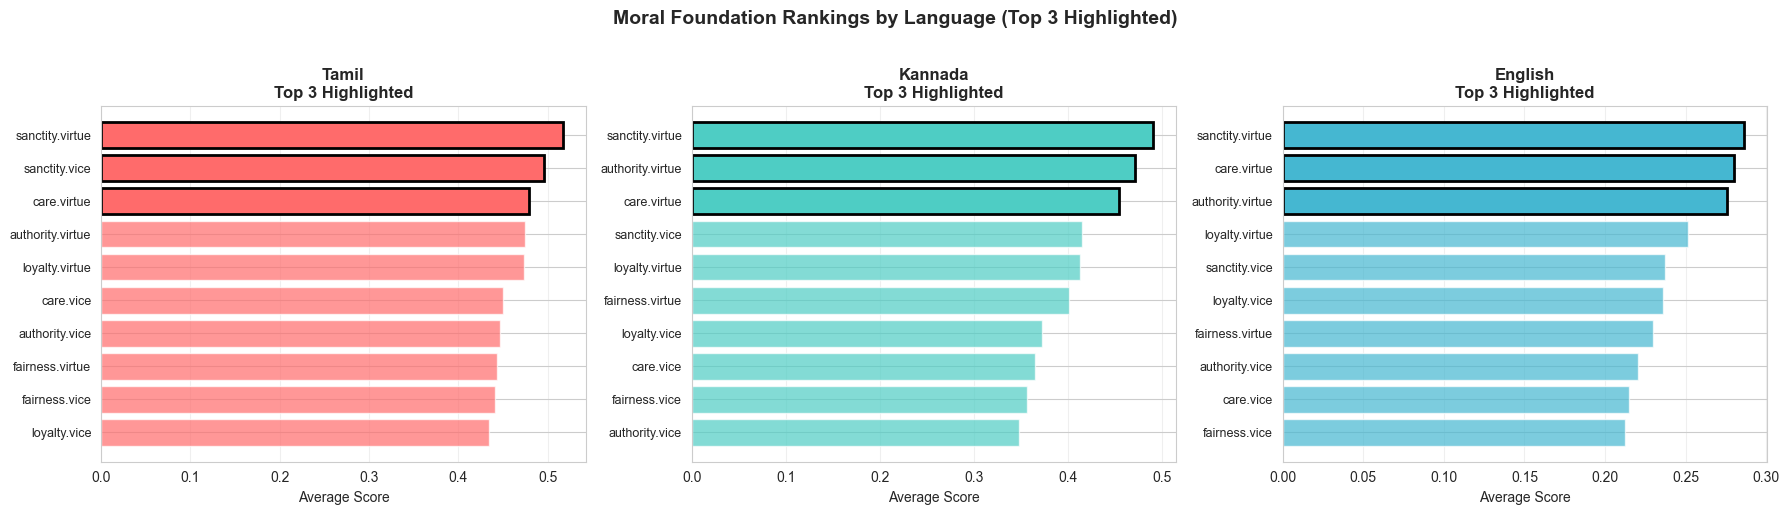


✓ Saved: cross_cultural_top3_comparison.png


In [4]:
# Create bar plot showing all morals for each language
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

for idx, (language, color) in enumerate(zip(['Tamil', 'Kannada', 'English'], colors)):
    sorted_scores = moral_scores_df[language].sort_values(ascending=False)
    axes[idx].barh(range(len(sorted_scores)), sorted_scores.values, color=color, alpha=0.7)
    axes[idx].set_yticks(range(len(sorted_scores)))
    axes[idx].set_yticklabels(sorted_scores.index, fontsize=9)
    axes[idx].set_xlabel('Average Score', fontsize=10)
    axes[idx].set_title(f'{language}\nTop 3 Highlighted', fontsize=12, fontweight='bold')
    axes[idx].invert_yaxis()
    axes[idx].grid(axis='x', alpha=0.3)
    
    # Highlight top 3
    for i in range(3):
        axes[idx].get_children()[i].set_alpha(1.0)
        axes[idx].get_children()[i].set_linewidth(2)
        axes[idx].get_children()[i].set_edgecolor('black')

plt.suptitle('Moral Foundation Rankings by Language (Top 3 Highlighted)', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('cross_cultural_top3_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Saved: cross_cultural_top3_comparison.png")

## Step 4: Spearman Rank Correlation Across Languages

Spearman rank correlation assesses whether languages rank moral foundations in a similar order.
- **ρ > 0.7**: Strong consistency in moral priorities
- **ρ = 0.4-0.7**: Moderate consistency
- **ρ < 0.4**: Different moral priorities

In [5]:
print("\n" + "="*70)
print("SPEARMAN RANK CORRELATION ANALYSIS")
print("="*70)

# Calculate pairwise correlations
comparisons = [
    ('Tamil', 'Kannada'),
    ('Tamil', 'English'),
    ('Kannada', 'English')
]

results = []

for lang1, lang2 in comparisons:
    rho, pval = spearmanr(moral_scores_df[lang1], moral_scores_df[lang2])
    results.append({
        'Comparison': f'{lang1} vs {lang2}',
        'Spearman ρ': rho,
        'p-value': pval,
        'Significant': 'Yes' if pval < 0.05 else 'No'
    })
    
    print(f"\n{lang1} vs {lang2}:")
    print(f"  Spearman ρ = {rho:.4f}")
    print(f"  p-value = {pval:.4f}")
    
    if pval < 0.001:
        sig_str = "*** (highly significant)"
    elif pval < 0.01:
        sig_str = "** (very significant)"
    elif pval < 0.05:
        sig_str = "* (significant)"
    else:
        sig_str = "ns (not significant)"
    print(f"  Significance: {sig_str}")
    
    if rho > 0.7:
        print(f"  Interpretation: STRONG consistency - languages rank morals similarly")
    elif rho > 0.4:
        print(f"  Interpretation: MODERATE consistency - some agreement on ranking")
    elif rho > 0.0:
        print(f"  Interpretation: WEAK consistency - different moral priorities")
    else:
        print(f"  Interpretation: NEGATIVE correlation - opposite priorities")

results_df = pd.DataFrame(results)
print("\n" + "="*70)
print("Summary Table:")
print("="*70)
print(results_df.to_string(index=False))


SPEARMAN RANK CORRELATION ANALYSIS

Tamil vs Kannada:
  Spearman ρ = 0.7939
  p-value = 0.0061
  Significance: ** (very significant)
  Interpretation: STRONG consistency - languages rank morals similarly

Tamil vs English:
  Spearman ρ = 0.7576
  p-value = 0.0111
  Significance: * (significant)
  Interpretation: STRONG consistency - languages rank morals similarly

Kannada vs English:
  Spearman ρ = 0.9273
  p-value = 0.0001
  Significance: *** (highly significant)
  Interpretation: STRONG consistency - languages rank morals similarly

Summary Table:
        Comparison  Spearman ρ  p-value Significant
  Tamil vs Kannada    0.793939 0.006100         Yes
  Tamil vs English    0.757576 0.011143         Yes
Kannada vs English    0.927273 0.000112         Yes


## Step 5: Correlation Heatmap

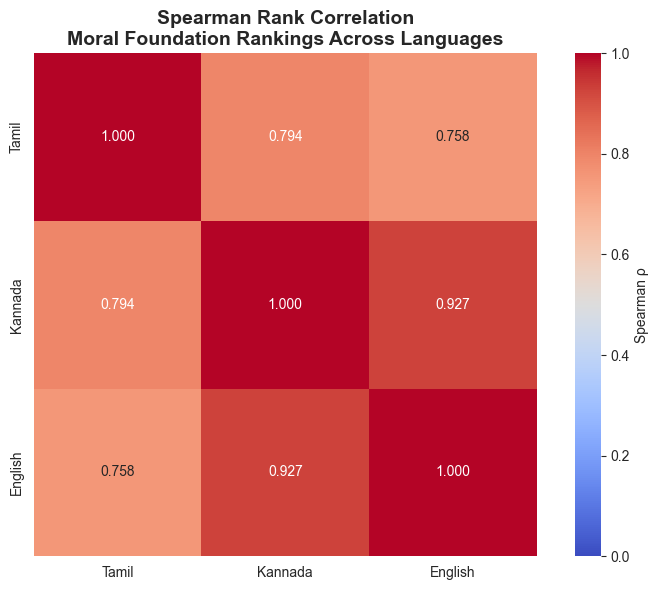


✓ Saved: cross_cultural_spearman_heatmap.png


In [6]:
# Create correlation matrix
corr_matrix = moral_scores_df.corr(method='spearman')

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0.5, vmin=0, vmax=1, square=True, ax=ax,
            cbar_kws={'label': 'Spearman ρ'})
ax.set_title('Spearman Rank Correlation\nMoral Foundation Rankings Across Languages', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('cross_cultural_spearman_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Saved: cross_cultural_spearman_heatmap.png")

## Step 6: Rankings Comparison Table


MORAL FOUNDATION RANKINGS BY LANGUAGE
(1 = highest score, 10 = lowest score)
                  Tamil  Kannada  English
Moral Foundation                         
care.virtue           3        3        2
care.vice             6        8        9
fairness.virtue       8        6        7
fairness.vice         9        9       10
loyalty.virtue        5        5        4
loyalty.vice         10        7        6
authority.virtue      4        2        3
authority.vice        7       10        8
sanctity.virtue       1        1        1
sanctity.vice         2        4        5


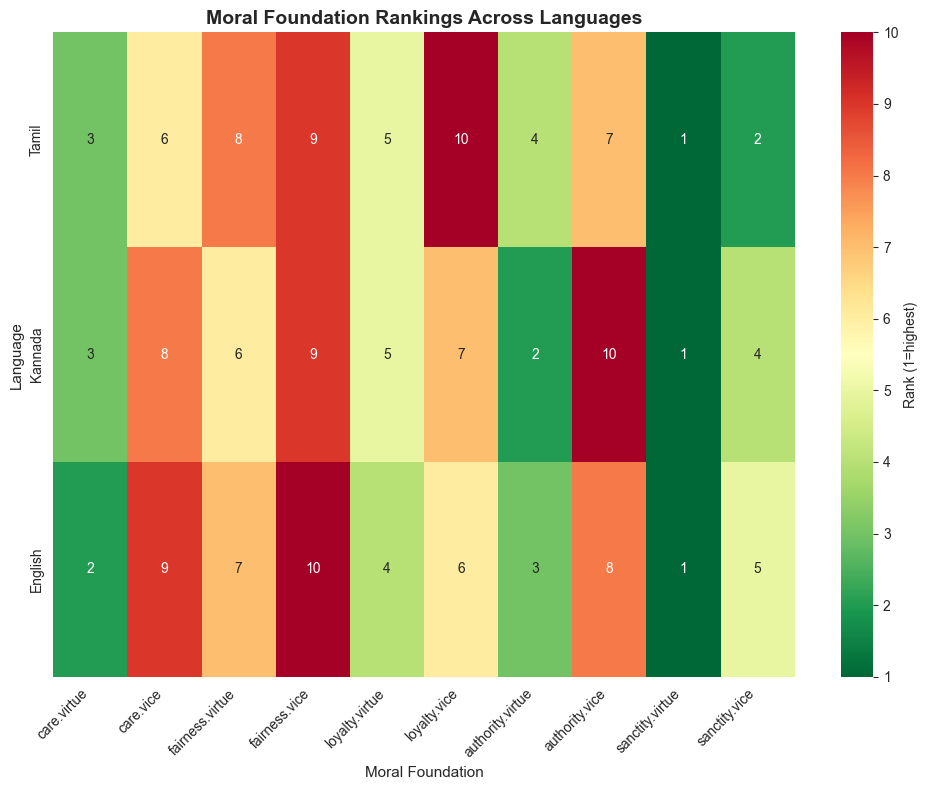


✓ Saved: cross_cultural_rankings_table.png


In [7]:
# Create ranking table
rankings_df = moral_scores_df.rank(ascending=False, method='min').astype(int)

print("\n" + "="*70)
print("MORAL FOUNDATION RANKINGS BY LANGUAGE")
print("(1 = highest score, 10 = lowest score)")
print("="*70)
print(rankings_df)

# Visualize rankings
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(rankings_df.T, annot=True, fmt='d', cmap='RdYlGn_r', 
            cbar_kws={'label': 'Rank (1=highest)'}, ax=ax, vmin=1, vmax=10)
ax.set_title('Moral Foundation Rankings Across Languages', fontsize=14, fontweight='bold')
ax.set_xlabel('Moral Foundation', fontsize=11)
ax.set_ylabel('Language', fontsize=11)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('cross_cultural_rankings_table.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Saved: cross_cultural_rankings_table.png")

## Step 7: Summary and Key Findings

In [8]:
print("\n" + "="*70)
print("KEY FINDINGS SUMMARY")
print("="*70)

print("\n1. TOP 3 DOMINANT MORALS BY LANGUAGE:")
print("-" * 70)
for language in ['Tamil', 'Kannada', 'English']:
    top_3 = moral_scores_df[language].sort_values(ascending=False).head(3)
    print(f"\n  {language}:")
    for i, (moral, score) in enumerate(top_3.items(), 1):
        print(f"    {i}. {moral} ({score:.4f})")

print("\n\n2. CROSS-LANGUAGE CONSISTENCY (Spearman Correlation):")
print("-" * 70)
for _, row in results_df.iterrows():
    print(f"  {row['Comparison']:25s}: ρ = {row['Spearman ρ']:.3f} (p = {row['p-value']:.4f})")

print("\n\n3. INTERPRETATION:")
print("-" * 70)
avg_correlation = results_df['Spearman ρ'].mean()
print(f"  Average cross-language correlation: {avg_correlation:.3f}")

if avg_correlation > 0.7:
    print("  → Languages show STRONG consistency in moral priorities")
elif avg_correlation > 0.4:
    print("  → Languages show MODERATE consistency in moral priorities")
else:
    print("  → Languages show WEAK consistency - different moral priorities")

# Find most consistent moral (similar ranking across all languages)
rank_variance = rankings_df.var(axis=1)
most_consistent = rank_variance.idxmin()
least_consistent = rank_variance.idxmax()

print(f"\n  Most consistently ranked moral: {most_consistent}")
print(f"    Rankings: Tamil={rankings_df.loc[most_consistent, 'Tamil']}, "
      f"Kannada={rankings_df.loc[most_consistent, 'Kannada']}, "
      f"English={rankings_df.loc[most_consistent, 'English']}")

print(f"\n  Most variably ranked moral: {least_consistent}")
print(f"    Rankings: Tamil={rankings_df.loc[least_consistent, 'Tamil']}, "
      f"Kannada={rankings_df.loc[least_consistent, 'Kannada']}, "
      f"English={rankings_df.loc[least_consistent, 'English']}")

print("\n" + "="*70)
print("ANALYSIS COMPLETE")
print("="*70)

# Save summary to CSV
summary_data = {
    'Language': ['Tamil', 'Kannada', 'English'],
    'Top_1': [moral_scores_df[lang].idxmax() for lang in ['Tamil', 'Kannada', 'English']],
    'Top_1_Score': [moral_scores_df[lang].max() for lang in ['Tamil', 'Kannada', 'English']],
    'Top_2': [moral_scores_df[lang].sort_values(ascending=False).index[1] for lang in ['Tamil', 'Kannada', 'English']],
    'Top_2_Score': [moral_scores_df[lang].sort_values(ascending=False).values[1] for lang in ['Tamil', 'Kannada', 'English']],
    'Top_3': [moral_scores_df[lang].sort_values(ascending=False).index[2] for lang in ['Tamil', 'Kannada', 'English']],
    'Top_3_Score': [moral_scores_df[lang].sort_values(ascending=False).values[2] for lang in ['Tamil', 'Kannada', 'English']]
}

summary_df = pd.DataFrame(summary_data)
summary_df.to_csv('cross_cultural_summary.csv', index=False)
print("\n✓ Saved: cross_cultural_summary.csv")

# Save full results
results_df.to_csv('cross_cultural_spearman_results.csv', index=False)
print("✓ Saved: cross_cultural_spearman_results.csv")

moral_scores_df.to_csv('cross_cultural_all_scores.csv')
print("✓ Saved: cross_cultural_all_scores.csv")


KEY FINDINGS SUMMARY

1. TOP 3 DOMINANT MORALS BY LANGUAGE:
----------------------------------------------------------------------

  Tamil:
    1. sanctity.virtue (0.5166)
    2. sanctity.vice (0.4953)
    3. care.virtue (0.4789)

  Kannada:
    1. sanctity.virtue (0.4906)
    2. authority.virtue (0.4709)
    3. care.virtue (0.4537)

  English:
    1. sanctity.virtue (0.2862)
    2. care.virtue (0.2800)
    3. authority.virtue (0.2759)


2. CROSS-LANGUAGE CONSISTENCY (Spearman Correlation):
----------------------------------------------------------------------
  Tamil vs Kannada         : ρ = 0.794 (p = 0.0061)
  Tamil vs English         : ρ = 0.758 (p = 0.0111)
  Kannada vs English       : ρ = 0.927 (p = 0.0001)


3. INTERPRETATION:
----------------------------------------------------------------------
  Average cross-language correlation: 0.826
  → Languages show STRONG consistency in moral priorities

  Most consistently ranked moral: sanctity.virtue
    Rankings: Tamil=1, Kannada